# Module import

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers.utils import load_image

# load finetuning model

In [5]:
def finetuned_instruct(checkpoint_path, result_path = "results_default"):
    pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(
        checkpoint_path, torch_dtype=torch.float16,
        safety_checker = None,
        requires_safety_checker = False
    ).to("cuda:0")

    data_path = "/data2/generation/data/trainA"
    image_files = ["0051.png", "0541.png", "0539.png", "0560.png", "0143.png"]
    caption_list = ['Turn it into a creature with a white belly and a red face and back.',
                    'Turn it into a monster enveloped in a black sphere, with a white body and yellow mouth.', 
                    'Turn it into a girl with a white body, adorned with a black ribbon, and green lips.', 
                    'Turn it into a being with a white back, red inner wings, and a black belly.', 
                    'Turn it into a dog adorned with black bones and a purple body.']
    
    for image_file, caption in zip(image_files, caption_list):
        image = load_image(os.path.join(data_path, image_file))
        
        image = pipeline(caption, image=image).images[0]
        image.save(f"/data2/generation/data/{result_path}/{image_file}")

In [20]:
image_path = "/data/generation/0001.png"
"result_" + image_path.split('/')[-1].split('.')[0] + ".jpg"

'result_0001.jpg'

In [10]:
def finetuned_instruct(checkpoint_path, image_path, prompt, result_path = "/data2/generation/data/results_web"):
    pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(
        checkpoint_path, torch_dtype=torch.float16,
        safety_checker = None,
        requires_safety_checker = False
    ).to("cuda:0")
    
    image = load_image(image_path)
    file_name = image_path.split('/')[-1]
    image = pipeline(prompt, image=image).images[0]
    image.save(f"{result_path}/{prompt[-10:]}_{file_name}")

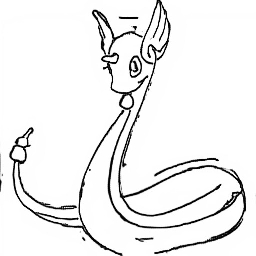

In [11]:
load_image("/data2/generation/data/trainA/0051.png")

In [12]:
finetuned_instruct(checkpoint_path = "./pix2pokemon",
                  image_path = "/data2/generation/data/trainA/0051.png",
                  prompt = "Turn it into a creature with a white belly and a red face and back.",
                  result_path = "/data2/generation/data/results_web")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

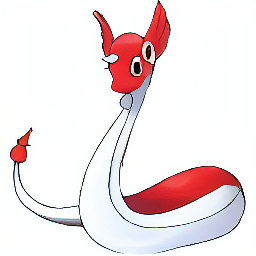

In [14]:
load_image("/data2/generation/data/results_web/ and back._0051.png")

# Data load

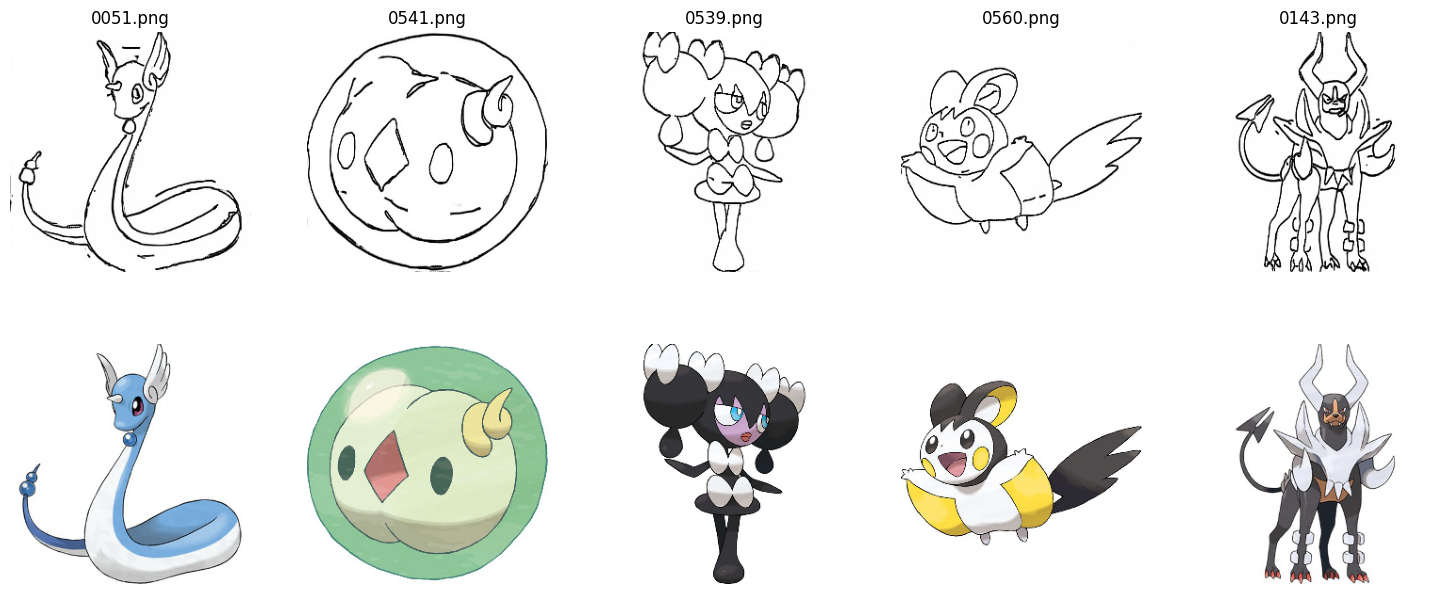

In [3]:
data_path = "/data2/generation/data/trainA"
label_path = "/data2/generation/data/trainB"

image_files = ["0051.png", "0541.png", "0539.png", "0560.png", "0143.png"]



fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, image_file in enumerate(image_files):
    image = load_image(os.path.join(data_path, image_file))
    axs[0, i].imshow(image)
    axs[0, i].axis('off')
    axs[0, i].set_title(image_file)

for i, image_file in enumerate(image_files):
    image = load_image(os.path.join(label_path, image_file))
    axs[1, i].imshow(image)
    axs[1, i].axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


# prediction

## Default

In [ ]:
finetuned_instruct(
    checkpoint_path = "./pix2pokemon",
    result_path = "results_default")

## CLIP

In [8]:
finetuned_instruct(
    checkpoint_path = "./pix2pokemon_CLIP",
    result_path = "results_CLIP")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]